# Trabalho 3 - Processamento Digital de Imagens
Semestre 2023/1
## Implementação dos algoritmos DFT e FFT para o caso 2D
      Professor: Alexandre L. M. Levada
      Aluno: Leticia Bossatto Marchezi
      RA: 791003

## Discrete Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

Leitura e redimensionamento da imagem para 64x64 e conversão para array np

In [2]:
img = PIL.Image.open("camera.tif")
img2 = img.resize((64,64))

img_array = np.array(img2)

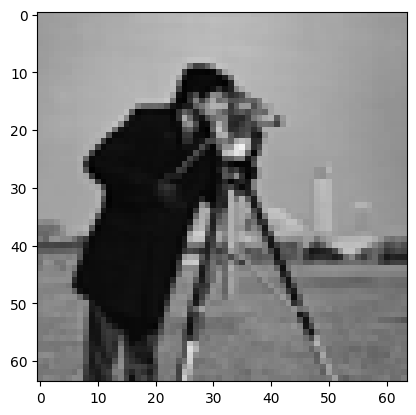

In [3]:
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.show()

DFT2D implementada aplicando a DFT 1D em ambas dimensões.
$M$ são as linhas e $N$ as colunas e itera 4 loops.

In [4]:
def DFT2D(input_img):
    M,N = input_img.shape
    output_img = np.zeros((M,N)).astype('complex')
    for i in range(M):
        for j in range(N):
            sums = 0
            for k in range(M):
                for l in range(N):
                    sums += input_img[k,l]*np.exp(-2j * np.pi *( (i*k) / M + (j*l)/ N))
            output_img[i,j] = sums

    return output_img

Aplica a DFT2D e realiza e desloca o componente com frequência 0 no centro para melhorar a visualização.

In [5]:
result_img = DFT2D(img_array)
centralized_img = np.fft.fftshift(result_img.real)

Verificação do resultado da DFT2D comparando com o algoritmo FFT2D implementado na biblioteca numpy

In [6]:
print(np.allclose(np.fft.fft2(img_array), result_img))

True


Visualizacão do output sem o shift, a frequência 0 está posicionada no canto esquerdo superior.

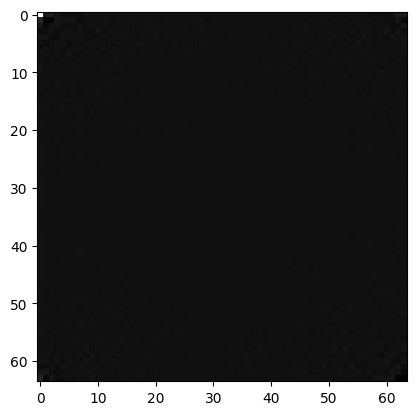

In [7]:
plt.imshow(result_img.real,cmap='gray')

Output com shift, posicionado no centro da imagem

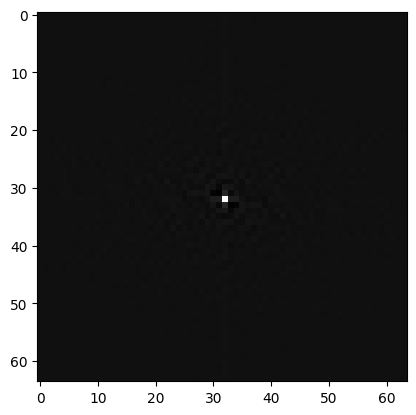

In [8]:
plt.imshow(centralized_img,cmap='gray')

## Fast Fourier Transform
Função para o cálculo da Transformada de Fourier Rápida 1D. Utiliza da propriedade de simetria da FFT para otimizar o cálculo.

In [9]:
def FFT1D(x):
  # Tamanho do vetor
  N = len(x)

  # Caso base:
  if N == 1:
    return x

  # Chamadas recursivas
  Xpar, Ximpar = FFT1D(x[::2]), FFT1D(x[1::2])

  # Cálculo do elemento k e de seu simétrico
  X = np.zeros(N).astype('complex')
  for k in range(N//2):
    X[k] = Xpar[k] + Ximpar[k] * np.exp(-2j * np.pi * k / N)
    X[k+N//2] = Xpar[k] - Ximpar[k] * np.exp(-2j * np.pi * k / N)
  return X

O algoritmo da FFT2D utiliza a FFT1D aplicada em cada uma das linhas da imagem, posteriormente aplicando a FFT1D sob as colunas resultantes do processo anterior com uma transposição das linhas pelas colunas.

$M$ representa as linhas e $N$ as colunas

In [10]:
def FFT2D(input_img):
    M,N = input_img.shape
    aux_img = np.zeros((M,N)).astype('complex')
    output_img = np.zeros((M,N)).astype('complex')
    for m in range(M):
        aux_img[m] = FFT1D(input_img[m,:])
    for n in range(N):
        output_img[n]=FFT1D(aux_img[:,n])

    return np.transpose(output_img)

Cálculo da FFT

In [11]:
fft_result_img=FFT2D(img_array)

Verificação do resultado da FFT2D comparando com o DFT2D

In [12]:
print(np.allclose(fft_result_img, result_img))

True


Visualização do output da FFT2D (imagem no domínio da frequência)

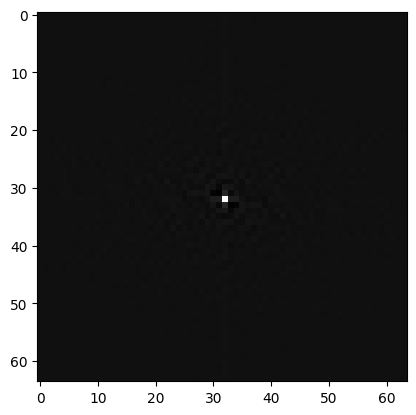

In [13]:
plt.imshow(np.fft.fftshift(fft_result_img.real),cmap='gray')